# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [9]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [11]:
#On importe les données dans un dataframe
df_data = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")

df_data.head()

#Vérifie les doublons
lignes_doublons = df_data[df_data.duplicated(keep=False)]
# Afficher les lignes en double
#print("Lignes en double :")
#print(lignes_doublons)

print(f'Nombre total de doublons : {df_data.duplicated().sum()}')

# Supprimer les doublons sur toutes les colonnes directement dans df_data
df_data.drop_duplicates(inplace=True)
#print(df_data.shape[0])

Nombre total de doublons : 16


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [13]:
#On vérifie que le type des données attribué par pandas est cohérent
print(df_data.dtypes)
df_data.info()

#colonne date_mutation est au format datetime sinon pd.to_datetime() 


date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 26180 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26180 non-null  datetime64[ns]
 1   valeur_fonciere   26180 non-null  float64       
 2   adresse_numero    26180 non-null  int64         
 3   adresse_nom_voie  26180 non-null  object        
 4   code_postal       26180 non-null  int64         
 5   nom_commune       26180 non-null  object        
 6   code_type_local   26180 non-null  int64         
 7   type_local        26180 non-null  object        
 8   surface_reelle    26180

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

la liste des différents types de biens immobiliers que nous avons dans les données est : ['Appartement' 'Local industriel. commercial ou assimilé']
On observe qu'il y a 2 types de biens, et que leurs codes types sont : [2 4]


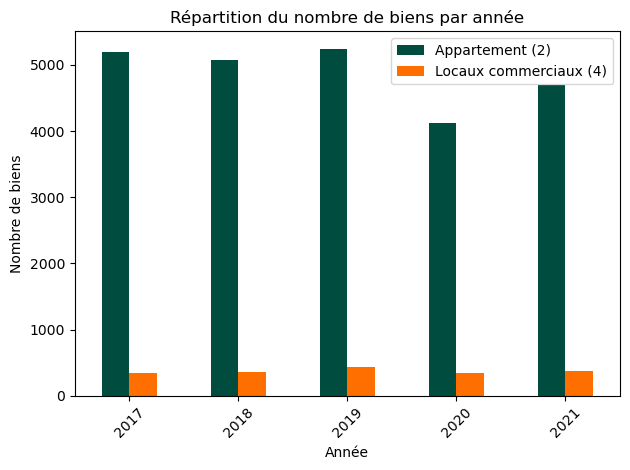

Pourcentage Appartement: 92.96 %
Pourcentage Locaux commerciaux: 7.04 %


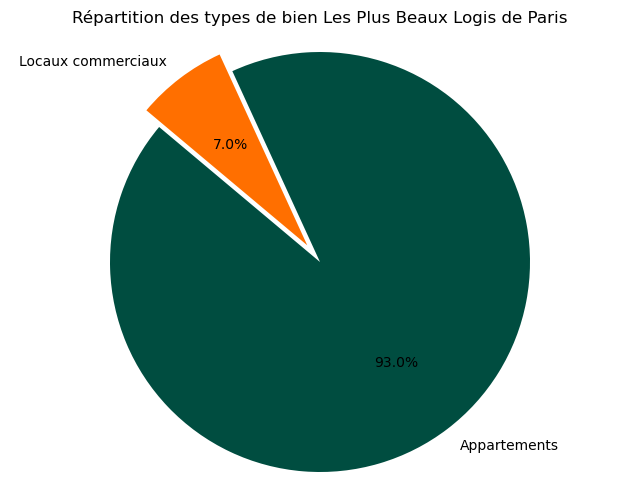

In [15]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :', df_data['type_local'].unique())

print('On observe qu\'il y a', df_data['type_local'].nunique(),'types de biens, et que leurs codes types sont :', df_data['code_type_local'].unique())

#Extraire l'année
df_repartition = df_data.copy()
df_repartition['annee'] = df_data['date_mutation'].dt.year

# Compter le nombre de biens par année et type
count_data = df_repartition.groupby(['annee', 'code_type_local']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt
# Créer le graphique
count_data.plot(kind='bar', stacked=False, color = ['#004D40', '#FF6F00'])
plt.title('Répartition du nombre de biens par année')
plt.xlabel('Année')
plt.ylabel('Nombre de biens')
plt.xticks(rotation=45)
plt.legend(['Appartement (2)', 'Locaux commerciaux (4)'])
plt.tight_layout()
plt.show()

print('Pourcentage Appartement:', round((df_data[df_data['code_type_local'] == 2].shape[0] / df_data.shape[0]) * 100,2),'%')
print('Pourcentage Locaux commerciaux:', round((df_data[df_data['code_type_local'] == 4].shape[0] / df_data.shape[0]) * 100,2),'%')


# Compter le nombre d'Appartements et de Locaux commerciaux
nombre_appartements = df_data[df_data['code_type_local'] == 2].shape[0]
nombre_locaux_commerciaux = df_data[df_data['code_type_local'] == 4].shape[0]

# Préparer les données pour le graphique
labels = ['Appartements', 'Locaux commerciaux']
sizes = [nombre_appartements, nombre_locaux_commerciaux]
colors = ['#004D40', '#FF6F00'] # Couleurs pour le graphique
explode = (0.1, 0)  # "Exploser" la première part (Appartements) pour une meilleure visibilité

# Créer le graphique pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  # Pour que le pie chart soit un cercle
plt.title('Répartition des types de bien Les Plus Beaux Logis de Paris')
plt.show()


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4. 

### 3. Nombre de transactions

In [18]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est',df_data.shape[0])
print('le nombre de transactions pour les appartements dans les données est', df_data[df_data['code_type_local'] == 2].shape[0])
print('le nombre de transactions pour les locaux commerciaux dans les données est',df_data[df_data['code_type_local'] == 4].shape[0])

le nombre de transactions dans les données est 26180
le nombre de transactions pour les appartements dans les données est 24338
le nombre de transactions pour les locaux commerciaux dans les données est 1842


### 4. interval de l'historique des données

In [20]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le', df_data['date_mutation'].min())
print('la dernière date de transaction dans les données est le', df_data['date_mutation'].max())

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [25]:
# Calcul de la colonne
df_data['prix_m²']=df_data['valeur_fonciere']/df_data['surface_reelle']
display(df_data.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m²
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [29]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

df_data_Appart=df_data.loc[df_data['code_type_local'] == 2].copy()

df_data_Appart.drop(columns=['code_type_local','type_local'],axis=1,inplace=True)
df_data_Appart=df_data_Appart.reset_index(drop=True)
display(df_data_Appart.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,surface_reelle,prix_m²
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,163,9671.732877
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,66,9966.020548
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,22,11367.582877
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,15,11751.113836


In [30]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_data_Appart_Annee = df_data_Appart.groupby(df_data_Appart['date_mutation'].dt.year)[['prix_m²', 'surface_reelle']].mean().reset_index()
display(df_data_Appart_Annee)

# Prix augmente alors que surface diminue sauf 2021 (effet covid) 

,date_mutation,prix_m²,surface_reelle
0,2017,9492.444883,44.628533
1,2018,10031.403432,44.271671
2,2019,10562.464260,43.374452
3,2020,10675.341817,42.911472
4,2021,10455.600126,43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que ça augmente jusqu'en 2020 puis chute significative (et inférieur à 2019)  <br>

Nous allons créer un graphique pour mieux le visualiser.

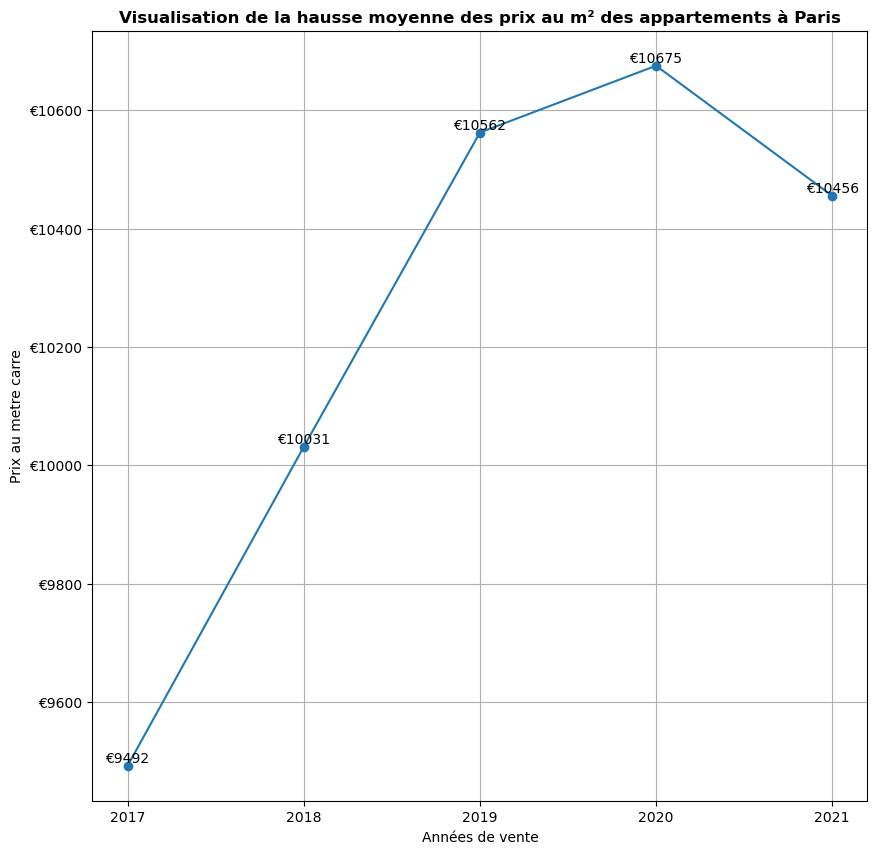

In [32]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_data_Appart_Annee['prix_m²'], marker='o')
plt.xlabel('Années de vente')
plt.ylabel('Prix au metre carre')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix au m² des appartements à Paris', fontweight='bold' )
for index, value in enumerate(df_data_Appart_Annee['prix_m²']):
    plt.text(index, value, f'€{value:.0f}', ha='center', va='bottom')
plt.show()



### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [41]:
#Liste des codes postaux dans nos données.
display(df_data_Appart['code_postal'].nunique())
sorted(df_data_Appart['code_postal'].unique())


20

[75001,
 75002,
 75003,
 75004,
 75005,
 75006,
 75007,
 75008,
 75009,
 75010,
 75011,
 75012,
 75013,
 75014,
 75015,
 75016,
 75017,
 75018,
 75019,
 75020]

In [43]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_data_Appart_Arrond = df_data_Appart.groupby([df_data_Appart['code_postal'], df_data_Appart['date_mutation'].dt.year])[['prix_m²', 'surface_reelle']].mean()
display(df_data_Appart_Arrond)


prix_m²  surface_reelle
code_postal date_mutation                              
75001       2017           11762.706289       45.241379
            2018           12621.226146       46.010204
            2019           13269.256149       34.307692
            2020           13405.991820       44.871429
            2021           13379.498578       47.777778
...                                 ...             ...
75020       2017            7886.023336       39.777070
            2018            8485.162808       37.337461
            2019            9093.992492       35.376093
            2020            9329.305302       33.937729
            2021            9114.398249       37.385455

[100 rows x 2 columns]

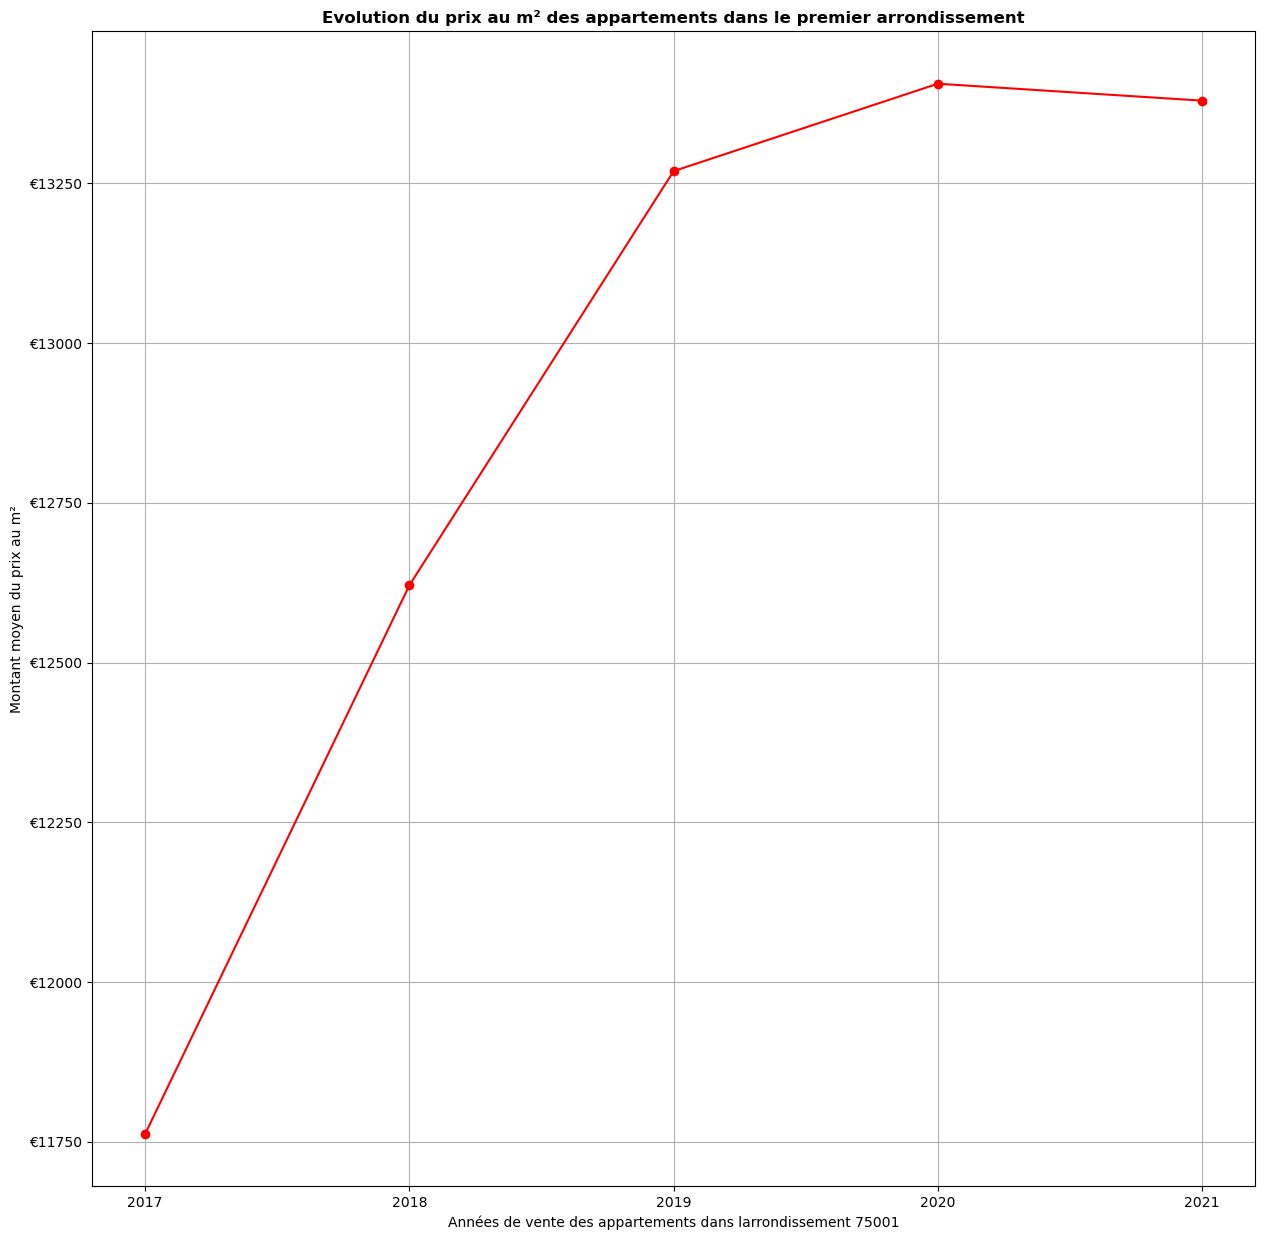

In [45]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

plt.figure(figsize=(15,15))
plt.plot(['2017', '2018', '2019', '2020', '2021'],(df_data_Appart_Arrond.loc[df_data_Appart_Arrond.index.get_level_values('code_postal') == 75001, 'prix_m²']).values, color='red', marker='o')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen du prix au m²')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² des appartements dans le premier arrondissement', fontweight='bold')

plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

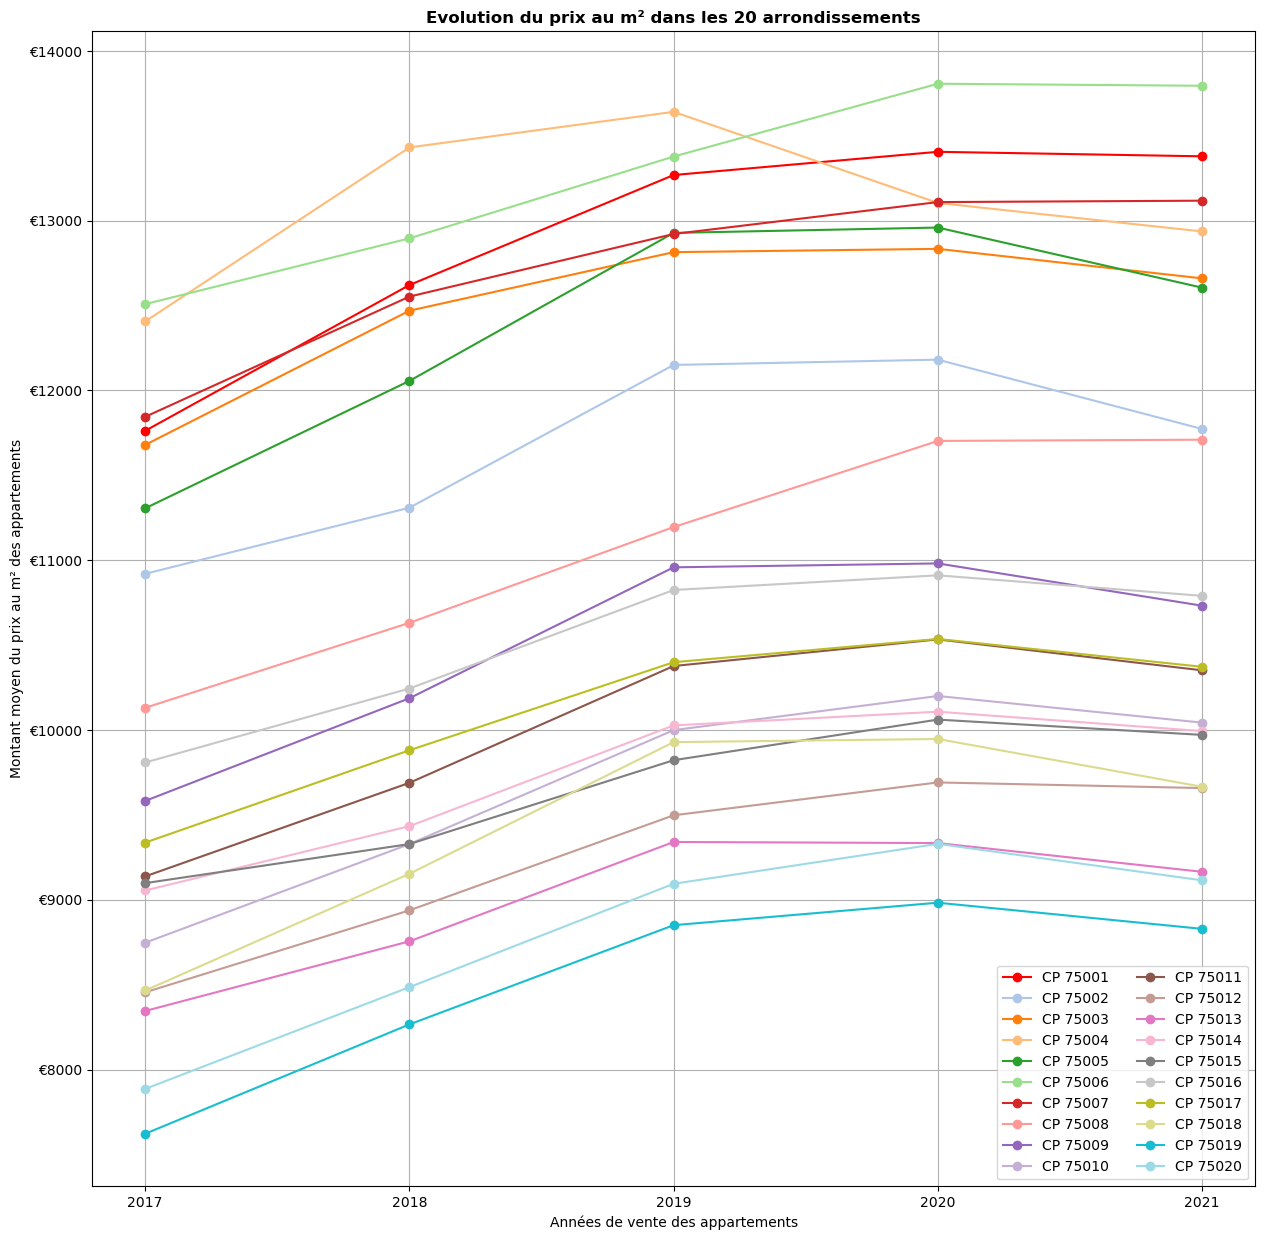

In [48]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
# Générer un nombre de couleurs différentes. Utilisons 'tab20' qui offre suffisamment de couleurs pour 20 arrondissements.
colors = plt.cm.tab20.colors

for idx, i in enumerate(df_data_Appart_Arrond.index.get_level_values('code_postal').unique()):
    prix_m2 = df_data_Appart_Arrond.loc[df_data_Appart_Arrond.index.get_level_values('code_postal') == i, 'prix_m²'].values

    # Assure que le nombre de valeurs correspond à l'intervalle historique
    if len(prix_m2) == len(interval_historique):
        # Si le code postal est 75001, tracer en rouge
        color = 'red' if i == 75001 else colors[idx % len(colors)]
        plt.plot(interval_historique, prix_m2, label=f'CP {i}', color=color, marker='o')

        
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen du prix au m² des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements' , fontweight='bold')
plt.legend(loc='lower center')  # Centrée en bas
plt.legend(ncol=2)
plt.show()

On observe que globalement que ?

IL semble y avoir une relation de croissance assez lineaire entre les prix au m² et les dates de vente entre 2017 et 2019/2020
Les prix  ont tendance a augmenter jusqu'en 2019 puis legerement /plateau jusqu'en 2020 pour finir par basser à partir de 2020.
Prix le plus éléve dans le 6 ème. Croissant jusqu'en 2020 puis plancher (pas de baisse). Tendance identique dans le 8 / 1  /7 ème

### 7. Prix au metre carré par transaction dans un arrondissement

In [52]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print((df_data_Appart['code_postal'] == 75006).sum())



709


On constate qu'il y a 709 transactions, donc un nombre echantillons suffissament important pour que le prix m² ne pas soit le fruit du hazard ! 

Affichons l'historique des transactions pour visualiser la dispersion des données :

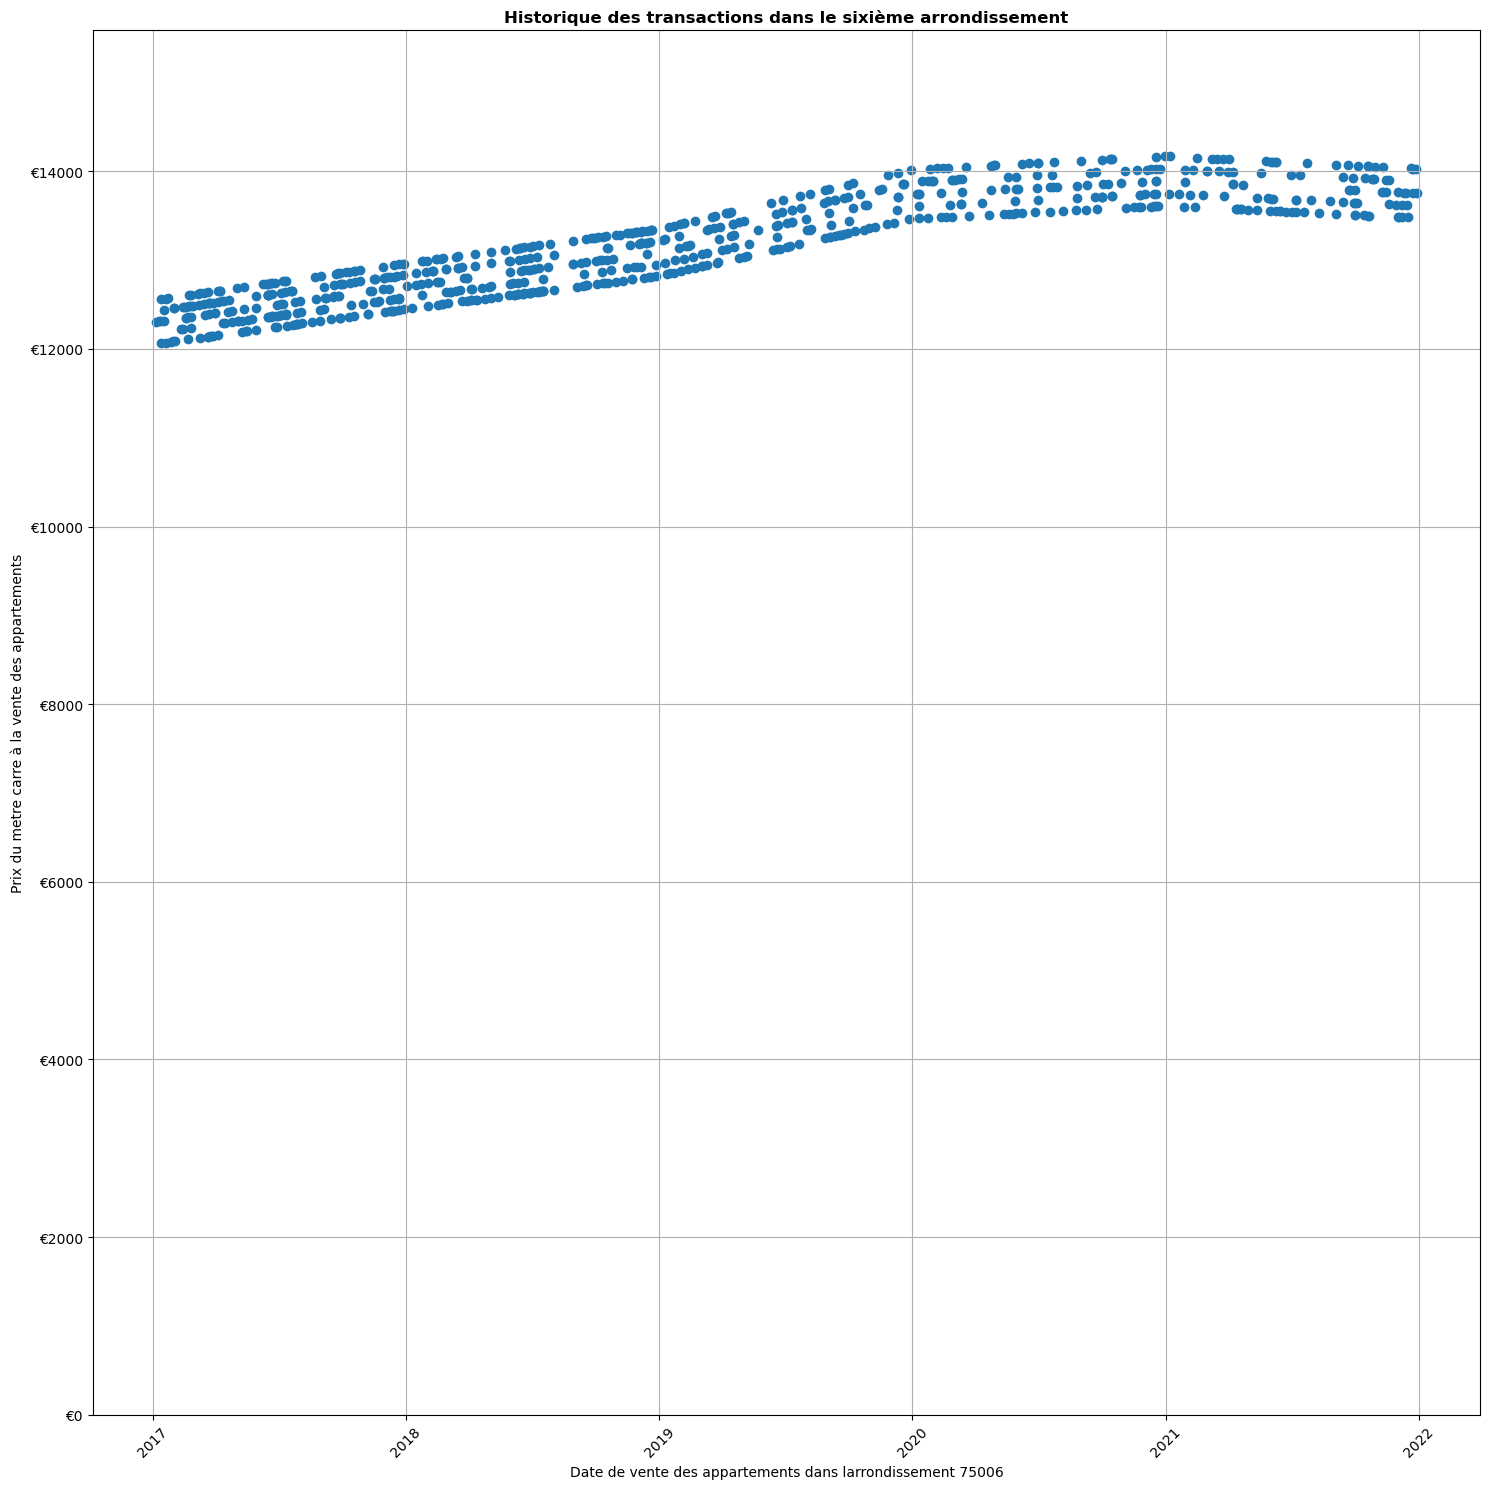

In [55]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot

plt.scatter(df_data_Appart.loc[df_data_Appart['code_postal'] == cp, 'date_mutation'],
            df_data_Appart.loc[df_data_Appart['code_postal'] == cp, 'prix_m²'])

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajustez la limite supérieure de l'axe y selon les données
plt.ylim(0, df_data_Appart['prix_m²'].max() * 1.1)  
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement' , fontweight='bold')
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des dates
plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement
plt.show()
#plt.ylim(0,1)
#plt.grid(which='both')
#plt.title('Historique des transactions dans le sixieme arrondissement')
#plt.show()

On observe que Toutes les transactions suivent la meme tendance: Croissant jusqu'en 2019/2020 puis plancher. 
Il semble y avoir une relation assez lineaire entre les prix au m² et les dates de vente entre 2017 et 2020

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

Coefficient de corrélation de Pearson: 0.9038446031491479
Valeur p: 7.108378962577139e-263
Le coefficient de corrélation est de 0.9 avec une valeur p de 0.0. Nous pouvons donc confirmer la corrélation.


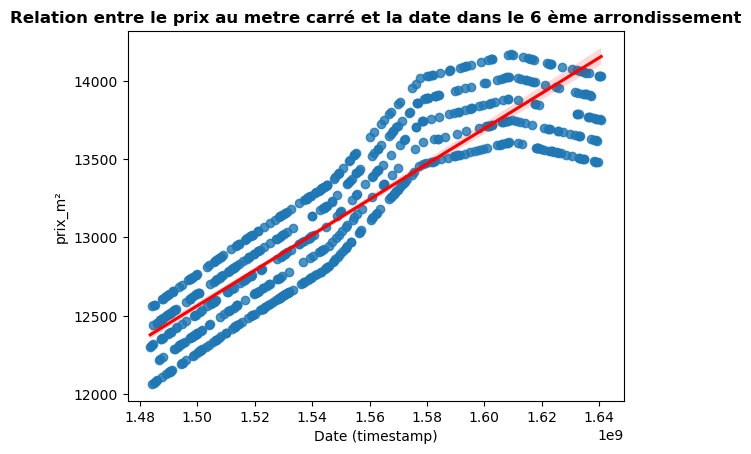

In [61]:
#On calcule la corrélation de Spearman
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr

# Extraire les colonnes pertinentes
date = df_data_Appart.loc[df_data_Appart['code_postal'] == cp, 'date_mutation']
prix = df_data_Appart.loc[df_data_Appart['code_postal'] == cp, 'prix_m²']

# Convertir les dates en timestamps
date = date.map(lambda x: x.timestamp())

# Visualisation de la tendance
sns.regplot(x=date, y=prix, robust=True, line_kws=dict(color="r"))
plt.xlabel('Date (timestamp)')

plt.title('Relation entre le prix au metre carré et la date dans le 6 ème arrondissement' , fontweight='bold')



# Calculer le coefficient de corrélation de Pearson et la valeur p
correlation, p_value = pearsonr(date, prix)

print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

print(f'Le coefficient de corrélation est de {round(correlation, 2)} avec une valeur p de {round(p_value,2)}. Nous pouvons donc confirmer la corrélation.')



Le coefficient de corrélation est de 0.9 avec une pvalue de 0 donc nous pouvons confirmer la corrélation.

Coefficient de corrélation de Pearson (r) : Le coefficient de corrélation de 0,9 indique une forte corrélation positive entre les prix_m² et la date. Cela signifie que, à mesure que la date augmente , le prix_m² augmente aussi.

Valeur p : La valeur p de 0,0 est inférieure au seuil de 0,05, indiquant que la corrélation est statistiquement significative. La relation observée n'est donc probablement pas due au simple hasard.

### 9. Vérification de la relation entre la valeur fonciere et la surface

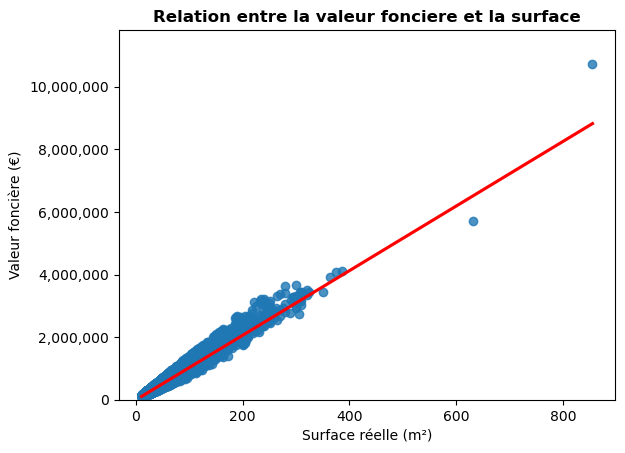

Coefficient de corrélation de Pearson: 0.980113700802959
Valeur p: 0.0
Le coefficient de corrélation est de 0.98 avec une valeur p de 0.0. Nous pouvons donc confirmer la corrélation.


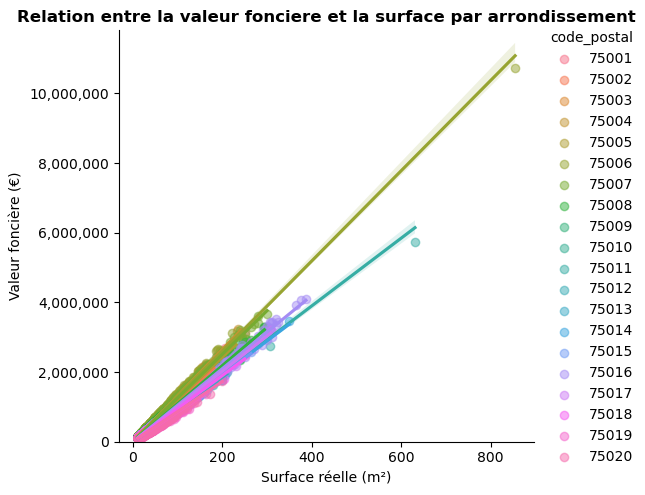

In [65]:
# Extraction des colonnes pertinentes
valeur = df_data_Appart['valeur_fonciere']
surface = df_data_Appart['surface_reelle']

# Visualisation de la tendance
sns.regplot(x=surface, y=valeur, robust=True, line_kws=dict(color="r"))
plt.xlabel('Surface réelle (m²)')
plt.ylabel('Valeur foncière (€)')

# Formate l'axe des Y pour afficher les milliers
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Limite l'échelle de l'axe Y
plt.ylim(0, valeur.max() * 1.1)

plt.title('Relation entre la valeur fonciere et la surface' , fontweight='bold')

plt.show()

# Calcul le coefficient de corrélation de Pearson et la valeur p
correlation, p_value = pearsonr(valeur, surface)

print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

print(f'Le coefficient de corrélation est de {round(correlation, 2)} avec une valeur p de {round(p_value,2)}. Nous pouvons donc confirmer la corrélation.')


#Visualisation de tous les arrondissements unitairement => suive tous la même tendance

# Visualisation avec lmplot
sns.lmplot(x='surface_reelle', y='valeur_fonciere', data=df_data_Appart, 
           hue='code_postal', markers='o', scatter_kws={'alpha':0.5})

plt.xlabel('Surface réelle (m²)')
plt.ylabel('Valeur foncière (€)')

# Formate l'axe des Y pour afficher les milliers
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Limite l'échelle de l'axe Y
plt.ylim(0, df_data_Appart['valeur_fonciere'].max() * 1.1)

plt.title('Relation entre la valeur fonciere et la surface par arrondissement' , fontweight='bold')

plt.show()



Le coefficient de corrélation est de 1.0 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [69]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_data_Com=df_data.loc[df_data['code_type_local'] == 4].copy()
df_data_Com.drop(columns=['code_type_local','type_local'],axis=1,inplace=True)
df_data_Com=df_data_Com.reset_index(drop=True)
display(df_data_Com.head())

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,surface_reelle,prix_m²
0,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,250,12453.109192
1,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,95,12256.581685
2,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,31,12266.199603
3,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,29,12496.006027
4,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,25,12636.289027


In [74]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_data_Com_Annee = df_data_Com.groupby(df_data_Com['date_mutation'].dt.year)['prix_m²'].mean().reset_index()

display(df_data_Com_Annee)

# Prix augmentent au fur à mesure des années!

,date_mutation,prix_m²
0,2017,10944.063022
1,2018,11569.499180
2,2019,11960.132050
3,2020,11966.470204
4,2021,12006.488691


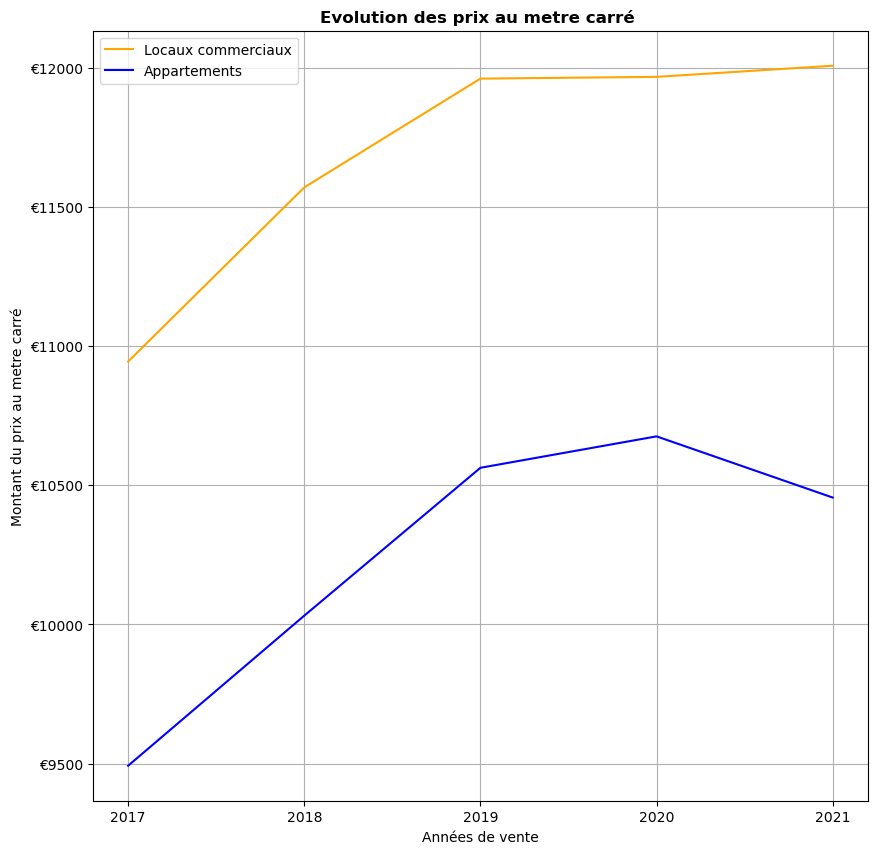

In [80]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'], df_data_Com_Annee['prix_m²'], label='Locaux commerciaux', color='orange')
plt.plot(['2017','2018','2019','2020','2021'], df_data_Appart_Annee['prix_m²'], label='Appartements', color='blue')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ', fontweight='bold')
plt.show()





Le prix au metre carré des locaux commerciaux est supérieur à celui des appartement et ne décroit pas à partir de 2020 (croissance très légére)

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

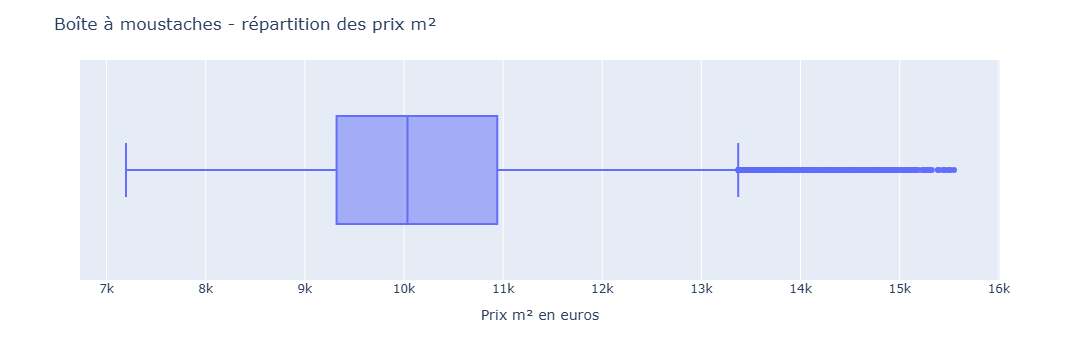

,date_mutation,valeur_fonciere,adresse_numero,code_type_local,surface_reelle,prix_m²,timestamp
count,26180,2.618000e+04,26180.000000,26180.000000,26180.000000,26180.000000,2.618000e+04
mean,2019-06-09 16:03:30.114591232,4.916967e+05,47.447899,2.140718,46.867265,10325.885135,1.560096e+09
min,2017-01-02 00:00:00,8.519470e+04,1.000000,2.000000,11.000000,7196.488356,1.483315e+09
25%,2018-03-14 18:00:00,2.340259e+05,10.000000,2.000000,23.000000,9320.665582,1.521050e+09
50%,2019-05-23 00:00:00,3.547085e+05,27.000000,2.000000,35.000000,10035.624521,1.558570e+09
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,2.000000,55.000000,10941.129041,1.600214e+09
max,2021-12-31 00:00:00,3.843359e+07,407.000000,4.000000,3945.000000,15547.797808,1.640909e+09
std,NaN,5.714485e+05,55.700865,0.511512,52.418216,1432.598255,4.568382e+07


Seuil pour les outliers en prix m²: 13371.82
nombre  outliers: 955
proportion outliers: 3.65 %


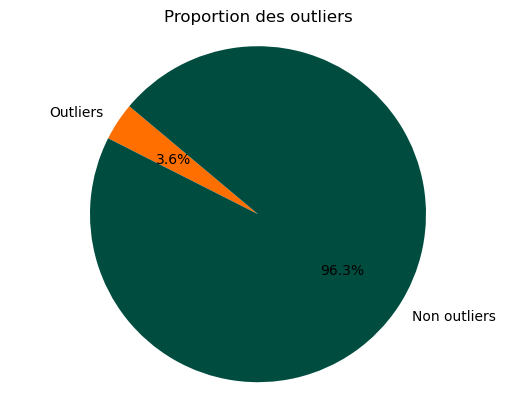

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                 object
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
prix_m²                    float64
timestamp                  float64
dtype: object


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,prix_m²,timestamp,code_postal_75001,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,Paris 3e Arrondissement,2,50,11011.193562,1.483402e+09,False,...,False,False,False,False,False,False,False,False,True,False
1,2017-01-12,1.576492e+06,32,AV MARCEAU,Paris 8e Arrondissement,2,163,9671.732877,1.484179e+09,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,66,9966.020548,1.484006e+09,False,...,False,False,False,False,False,False,False,False,True,False
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,Paris 3e Arrondissement,2,22,11367.582877,1.484006e+09,False,...,False,False,False,False,False,False,False,False,True,False
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,Paris 1er Arrondissement,2,15,11751.113836,1.484266e+09,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,Paris 4e Arrondissement,2,37,12735.781918,1.614211e+09,False,...,False,False,False,False,False,False,False,False,True,False
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,Paris 2e Arrondissement,4,150,13215.536370,1.613520e+09,False,...,False,False,False,False,False,False,False,False,False,True
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,Paris 2e Arrondissement,2,26,12016.765753,1.615162e+09,False,...,False,False,False,False,False,False,False,False,True,False
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,Paris 2e Arrondissement,2,13,12017.182877,1.615421e+09,False,...,False,False,False,False,False,False,False,False,True,False


In [98]:
# outlier prix m²
import plotly.express as px
fig = px.box(df_data, x="prix_m²")
fig.update_layout(title_text="Boîte à moustaches - répartition des prix m²")
fig.update_xaxes(title_text="Prix m² en euros")
fig.show()

#1,5 Fois l'ecart interquantile (Max de la boite a moustache) 
descr=df_data.describe()
display(descr)
seuilmax=(descr.loc['75%', 'prix_m²'])+1.5*((descr.loc['75%', 'prix_m²'])-(descr.loc['25%', 'prix_m²']))
print('Seuil pour les outliers en prix m²:',round(seuilmax,2))
print('nombre  outliers:',df_data.loc[(df_data["prix_m²"] > seuilmax)].shape[0])
print('proportion outliers:',round(df_data.loc[(df_data["prix_m²"] > seuilmax)].shape[0]*100 /df_data.shape[0],2),'%')

proportion_outliers = round(df_data.loc[(df_data["prix_m²"] > seuilmax)].shape[0]*100 /df_data.shape[0], 2)
sizes = [proportion_outliers, 100 - proportion_outliers]
labels = ['Outliers', 'Non outliers']
colors = ['#FF6F00', '#004D40']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion des outliers')
plt.show()

#Suppression outliers
#df_data = df_data[df_data["prix_m²"] <= seuilmax]

# on convertit en string
df_data['code_postal'] = df_data['code_postal'].astype(str)
df_data['type_local'] = df_data['type_local'].astype(str)

# on convertit date_mutation en timestamp 
df_data['timestamp'] = df_data['date_mutation'].map(lambda x: x.timestamp())

print(df_data.dtypes)

#one hot encoder pour 'code_postal' et 'type_local

df_data_ohe = pd.get_dummies(data=df_data, columns=['code_postal', 'type_local'])

display(df_data_ohe)


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [89]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière

from sklearn.model_selection import train_test_split

X = df_data_ohe[['timestamp', 'surface_reelle','code_postal_75001','code_postal_75002','code_postal_75003','code_postal_75004','code_postal_75005','code_postal_75006','code_postal_75007','code_postal_75008','code_postal_75009','code_postal_75010','code_postal_75011','code_postal_75012','code_postal_75013','code_postal_75014','code_postal_75015','code_postal_75016','code_postal_75017','code_postal_75018','code_postal_75019','code_postal_75020','type_local_Appartement','type_local_Local industriel. commercial ou assimilé']]  # Ajoutez d'autres variables si nécessaire
y = df_data_ohe['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [90]:
#conversion des données en str
df_data_ohe.columns
# toute les noms de colonnes sont deja bien des strings.

Index(['date_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_nom_voie', 'nom_commune', 'code_type_local', 'surface_reelle',
       'prix_m²', 'timestamp', 'code_postal_75001', 'code_postal_75002',
       'code_postal_75003', 'code_postal_75004', 'code_postal_75005',
       'code_postal_75006', 'code_postal_75007', 'code_postal_75008',
       'code_postal_75009', 'code_postal_75010', 'code_postal_75011',
       'code_postal_75012', 'code_postal_75013', 'code_postal_75014',
       'code_postal_75015', 'code_postal_75016', 'code_postal_75017',
       'code_postal_75018', 'code_postal_75019', 'code_postal_75020',
       'type_local_Appartement',
       'type_local_Local industriel. commercial ou assimilé'],
      dtype='object')

R^2 train 0.9815738793754585
MAE: 32821.643470204
MAPE: 0.09054948341941078
RMSE: 65290.48409965957
R^2 test 0.9820908207025172


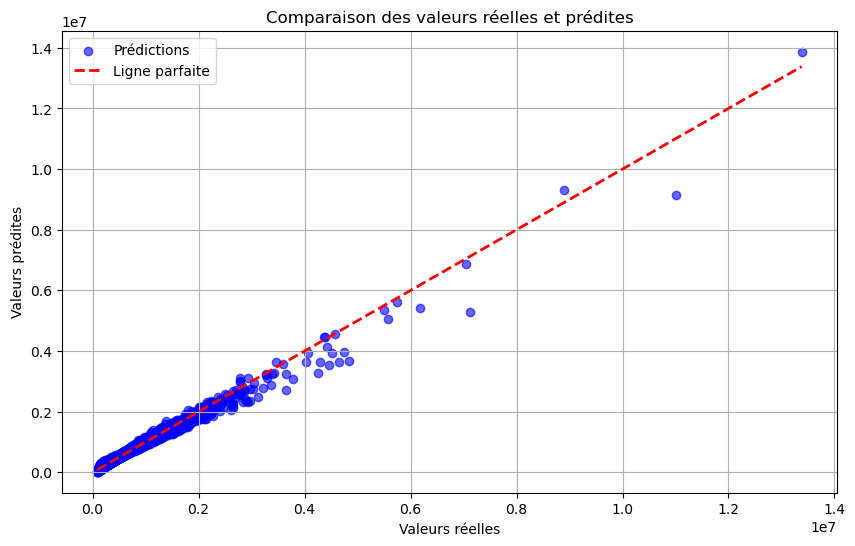

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#On entraîne l'algorithme ci-dessous et on effectue la prédiction

reg.fit(X_train, y_train)

print('R^2 train',reg.score(X_train,y_train))
#Interprétation du score (R^2) : Un score de 1 indique que le modèle explique parfaitement les données.

y_pred_test = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

from sklearn.metrics import r2_score
print('R^2 test',r2_score(y_test,y_pred_test))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ligne parfaite')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs réelles et prédites')
plt.legend()
plt.grid()
plt.show()


Notre algorithme fait donc 9 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :

 Les predictions sont bien alignées sur les valeurs reelles pour les valeur_fonciere de Tendance Central (<3M) et assez bien alignées pour les valeurs s'en ecartant (outliers /atypique)

- Séparation apprentissage / test pour tenir compte de la chronologie de la donnée (éviter de tester le modèle sur une transaction antérieure au jeu d'apprentissage) => implémentation de validation croisée / methode  cross_val_score 
- Standardisation des valeurs numériques pour que les variables aient toutes la même amplitude: surface / date  => utliser un scaler StandardScaler() pour standardiser les valeurs 
- Améliorer les données:  outliers (données aberrantes/ ATYPIQUES) prix m² > 13371 (Méthode Ecarts interquartiles) pour réduire le RMSE (sensible aux valeurs aberrantes)
- Ajouter un terme quadratique (surface²) 
- Rajouter de nouvelles variables prédictives comme l'adresse_nom_voie , le nombre de pieces etc...
- Plus d'historique/ année  : collecter plus de données et les ajouter au dataset

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [108]:
#On importe les données dans un dataframe
df_actif = pd.read_excel("portefeuille_actifs.xlsx")

df_actif.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [111]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

df_actif['code_postal'] = df_actif['code_postal'].astype(str)
df_actif['type_local'] = df_actif['type_local'].astype(str)
print(df_actif.dtypes)

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

# ajout du timestamp pour 31 décembre 2022
df_actif['timestamp'] = pd.to_datetime('2022-12-31').timestamp()

#renomme colonne surface_reelle_bati en surface_reelle
df_actif.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

display(df_actif.head())

#one hot encoder pour 'code_postal' et 'type_local
df_actif_ohe = pd.get_dummies(data=df_actif, columns=['code_postal', 'type_local'])
df_actif_ohe['timestamp'] = pd.to_datetime('2022-12-31').timestamp()

display(df_actif_ohe.head())



adresse_numero                 int64
adresse_nom_voie              object
code_postal                   object
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,timestamp
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,1.672445e+09
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,1.672445e+09
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,1.672445e+09
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,1.672445e+09
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,1.672445e+09


,adresse_numero,adresse_nom_voie,code_commune,nom_commune,surface_carrez,code_type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,127,RUE SAINT-DENIS,75101,Paris 1er Arrondissement,16.41,2,25,1,2.349593,48.863227,...,False,False,False,False,False,False,False,False,True,False
1,62,RUE NOTRE-DAME DE NAZARETH,75103,Paris 3e Arrondissement,20.47,2,22,1,2.356977,48.867907,...,False,False,False,False,False,False,False,False,True,False
2,62,RUE DE TURENNE,75103,Paris 3e Arrondissement,64.48,2,65,3,2.364855,48.859318,...,False,False,False,False,False,False,False,False,True,False
3,32,AV GEORGE V,75108,Paris 8e Arrondissement,63.29,2,74,2,2.301586,48.868893,...,False,False,False,False,False,False,False,False,True,False
4,152,BD HAUSSMANN,75108,Paris 8e Arrondissement,20.58,2,22,1,2.311643,48.875490,...,False,False,False,False,False,False,False,False,True,False


In [112]:
#Conversion du dataframe en str
df_actif_ohe.columns
# toute les noms de colonnes sont deja bien des strings.

Index(['adresse_numero', 'adresse_nom_voie', 'code_commune', 'nom_commune',
       'surface_carrez', 'code_type_local', 'surface_reelle',
       'nombre_pieces_principales', 'longitude', 'latitude', 'timestamp',
       'code_postal_75001', 'code_postal_75002', 'code_postal_75003',
       'code_postal_75004', 'code_postal_75005', 'code_postal_75006',
       'code_postal_75007', 'code_postal_75008', 'code_postal_75009',
       'code_postal_75010', 'code_postal_75011', 'code_postal_75012',
       'code_postal_75013', 'code_postal_75014', 'code_postal_75015',
       'code_postal_75016', 'code_postal_75017', 'code_postal_75018',
       'code_postal_75019', 'code_postal_75020', 'type_local_Appartement',
       'type_local_Local industriel. commercial ou assimilé'],
      dtype='object')

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [128]:
#On effectue la prédiction

X = df_actif_ohe[['timestamp', 'surface_reelle','code_postal_75001','code_postal_75002','code_postal_75003','code_postal_75004','code_postal_75005','code_postal_75006','code_postal_75007','code_postal_75008','code_postal_75009','code_postal_75010','code_postal_75011','code_postal_75012','code_postal_75013','code_postal_75014','code_postal_75015','code_postal_75016','code_postal_75017','code_postal_75018','code_postal_75019','code_postal_75020','type_local_Appartement','type_local_Local industriel. commercial ou assimilé']]  # Ajoutez d'autres variables si nécessaire

y_pred = reg.predict(X)

# Crée un DataFrame avec les prédictions
Prediction = pd.DataFrame(y_pred, columns=['prediction valeur_fonciere'])

# Ajoute la colonne des prédictions au DataFrame original
df_with_predictions = df_actif.copy()  # une copie du DataFrame original
df_with_predictions['prediction valeur_fonciere'] = Prediction['prediction valeur_fonciere']  # Ajouter la colonne

# Afficher le DataFrame avec les prédictions
display(df_with_predictions.head(10))  # Affiche les premières lignes pour vérification

#On vérifie les 10 premières valeurs


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,timestamp,prediction valeur_fonciere
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,1.672445e+09,438960.104513
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,1.672445e+09,372953.479237
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,1.672445e+09,822085.350456
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,1.672445e+09,872150.168402
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,1.672445e+09,329013.952044
5,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,33.40,2,Appartement,35,1,2.311643,48.875490,1.672445e+09,464798.006133
6,52,RUE DES GRAVILLIERS,75003,75103,Paris 3e Arrondissement,21.35,2,Appartement,24,2,2.355637,48.864366,1.672445e+09,393843.333712
7,208,RUE SAINT MAUR,75010,75110,Paris 10e Arrondissement,54.69,2,Appartement,60,3,2.371885,48.873209,1.672445e+09,640091.426146
8,142,RUE DE COURCELLES,75017,75117,Paris 17e Arrondissement,9.30,2,Appartement,11,1,2.300373,48.882505,1.672445e+09,148736.308902
9,52,RUE LAMARCK,75018,75118,Paris 18e Arrondissement,12.88,2,Appartement,13,1,2.342134,48.889431,1.672445e+09,147777.626263


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [132]:
#Valorisation du portefeuille sur le segment des particuliers
valeur_particuliers = df_with_predictions.loc[df_with_predictions['type_local'] == 'Appartement', 'prediction valeur_fonciere'].sum()
print('La valorisation du segment particulier est (en millions d\'euros) :', round(valeur_particuliers/1000000, 2), 'Million d\'Euros')


La valorisation du segment particulier est (en millions d'euros) : 71.23 Million d'Euros


In [134]:
#Valorisation du portefeuille sur le segment corporate
valeur_corporate = df_with_predictions.loc[df_with_predictions['type_local'] == 'Local industriel. commercial ou assimilé', 'prediction valeur_fonciere'].sum()
print('La valorisation du segment corporate est (en millions d\'euros) :', round(valeur_corporate/1000000, 2), 'Million d\'Euros')

pourcentage_ecart = ((valeur_corporate - valeur_particuliers) / valeur_corporate) * 100
print('Le pourcentage d\'écart entre les deux valeurs est de :', round(pourcentage_ecart, 2), '%')

print('Valorisation du portefeuille corporate est supérieure à Valorisation du portefeuille particuliers de', round(pourcentage_ecart, 2), '%')

# Ajout de la colonne Date en convertissant le timestamp en 31 Dec 2022
df_with_predictions['Date'] = pd.to_datetime(df_with_predictions['timestamp'], unit='s')
df_with_predictions.drop(columns=['timestamp'], inplace=True)
display(df_with_predictions.head())

#Export CSV
df_with_predictions.to_excel( "Prediction_valorisation_2022_actifs.xlsx", sheet_name="export", index=False )


La valorisation du segment corporate est (en millions d'euros) : 98.69 Million d'Euros
Le pourcentage d'écart entre les deux valeurs est de : 27.82 %
Valorisation du portefeuille corporate est supérieure à Valorisation du portefeuille particuliers de 27.82 %


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude,prediction valeur_fonciere,Date
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,438960.104513,2022-12-31
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,372953.479237,2022-12-31
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,822085.350456,2022-12-31
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,872150.168402,2022-12-31
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,329013.952044,2022-12-31


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Valorisation du portefeuille corporate est supérieure à Valorisation du portefeuille particuliers de 27.82 % avec une marge d'erreur de 9 %.
- Limite sur la prediction: estimations valables juste a moyen terme car la dimension temporel (nombre d'année d'entrainement) détermine la qualité de prediction: elle se degrade avec le temps suivant les tendances/contre tendances du marché immobilier et des évenements/aléas de l'immobilier (crises bâtiments, taux emprunts, évènements style covid etc..)

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [139]:
#On importe les données dans un dataframe
df_biens = pd.read_excel("echantillon_a_classer2.xlsx")
df_biens.head()



,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [142]:
df_biens['prix_m²']=df_biens['valeur_fonciere']/df_biens['surface_reelle']
df_biens.drop(columns=['valeur_fonciere','surface_reelle'], inplace=True)

display(df_biens.head())

,code_postal,nom_commune,prix_m²
0,75019,Paris 19e Arrondissement,9871.444128
1,75019,Paris 19e Arrondissement,10045.572493
2,75019,Paris 19e Arrondissement,9194.697790
3,75019,Paris 19e Arrondissement,9469.142168
4,75019,Paris 19e Arrondissement,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

Centroïdes des clusters : [[9806.92467429]
 [7408.77502952]]
silhouette_score:  0.9086063492674448


C:\Users\frjol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,code_postal,nom_commune,prix_m²,cluster
0,75019,Paris 19e Arrondissement,9871.444128,0
1,75019,Paris 19e Arrondissement,10045.572493,0
2,75019,Paris 19e Arrondissement,9194.697790,0
3,75019,Paris 19e Arrondissement,9469.142168,0
4,75019,Paris 19e Arrondissement,7463.610005,1


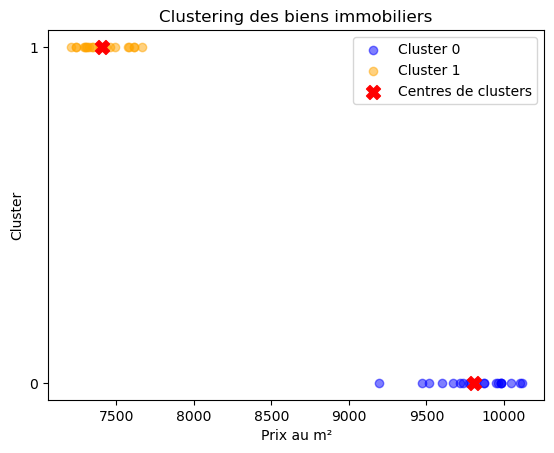

In [145]:
from sklearn.cluster import KMeans

X = df_biens[['prix_m²']]

k_means = KMeans( n_clusters=2, random_state = 808, n_init = 'auto')
k_means.fit(X)
print('Centroïdes des clusters :', k_means.cluster_centers_)


df_biens['cluster'] = k_means.labels_ # Ajoutez les labels de clusters à votre dataframe

from sklearn.metrics import silhouette_score
print("silhouette_score: ", silhouette_score(X,df_biens['cluster'])) # Le score de silhouette est une mesure de la qualité d’un clustering.

display(df_biens.head())

# Filtrer les données par cluster
cluster_0 = df_biens[df_biens['cluster'] == 0]
cluster_1 = df_biens[df_biens['cluster'] == 1]

# Tracer les données de cluster 0
plt.scatter(cluster_0['prix_m²'], [0] * len(cluster_0), color='blue', label='Cluster 0', alpha=0.5)

# Tracer les données de cluster 1
plt.scatter(cluster_1['prix_m²'], [1] * len(cluster_1), color='orange', label='Cluster 1', alpha=0.5)

# Ajout des centres de cluster
centres = k_means.cluster_centers_
# Centrer les centres sur l'axe Y selon leur cluster
plt.scatter(centres, [0, 1], c='red', marker='X', s=100, label='Centres de clusters')

# Étiquettes et titre
plt.xlabel('Prix au m²')
plt.ylabel('Cluster')
plt.title('Clustering des biens immobiliers')
plt.yticks([0, 1])  # Définir les valeurs possibles de Y comme 0 et 1
plt.legend()

# Affichage du graphique
plt.show()


In [146]:
# On vérifie les données de la prédiction

df_solutions_mentor = pd.read_excel("echantillon_a_classer_solution (2).xlsx")
df_solutions_mentor['prix_m²']=df_solutions_mentor['valeur_fonciere']/df_solutions_mentor['surface_reelle']
df_solutions_mentor.head()


,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m²
0,868687.083271,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,88,9871.444128
1,452050.762192,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,45,10045.572493
2,193088.653587,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,21,9194.697790
3,303012.549370,75019,Paris 19e Arrondissement,4,Local industriel. commercial ou assimilé,32,9469.142168
4,149272.200110,75019,Paris 19e Arrondissement,2,Appartement,20,7463.610005


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [148]:
#On affiche les résultats

df_biens['type_bien_predit'] = np.where(df_biens['cluster'] == 0, 'Local industriel. commercial ou assimilé', 'Appartement')

df_joined = pd.merge(df_biens, df_solutions_mentor, on='prix_m²')
#display(df_joined)

BonnePrediction = 0
df_joined['is_success'] = np.where(df_joined['type_bien_predit'] == df_joined['type_local'], 1, 0)
BonnePrediction = df_joined['is_success'].sum()

print("Le nombre de bonne Prédiction est de :", BonnePrediction ,'/', df_joined.shape[0])
print("L'exactitude (Accuracy) est de :", BonnePrediction/ df_joined.shape[0])

#Export CSV
df_joined.to_excel( "Prediction_type_bien_predit_19eme.xlsx", sheet_name="export", index=False )


Le nombre de bonne Prédiction est de : 40 / 40
L'exactitude (Accuracy) est de : 1.0


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- D'après les données connus a ce jour il faut vendre en premier lieux les appartements et plutôt garder les Locaux Commerciaux ou la valorisation globale est supérieur de 27%.
- Limites de l'exercice: Dépendance des tendances analysées sur les années 2017/2021 pour une projection sur 2022 uniquement, cette même analyse et algorithmes ne seraient pas valables pour de futur années dus à l’évolution du prix au m² et  aux aléas de l'immobilier (crises bâtiments, taux emprunts, évènement style covid etc..) => à recalibrer! 
